# Is Temperature a Random Walk (with Drift)?
Forecasting New York temperature

In [26]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools     import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model   import ARMA
from statsmodels.tsa.arima_model   import ARIMA

In [8]:
temp_NY       = pd.read_csv('./dataset/NOAA_TAVG.csv', index_col = 'DATE', parse_dates = True)
temp_NY.head()

,TAVG
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3


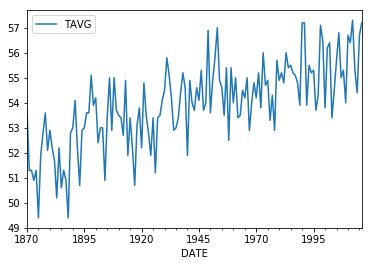

The p-value for the ADF test is  0.5832938987871106


In [11]:
# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

### Check autocorrelations
The data seems to follow a **random walk with drift**, i.e., it can be approximated as $y[t] = \mu + \phi y[t-1] + \epsilon[t]$. In this case one can take the first differences to make the time series **stationary**. Then compute the **sample ACF** and PACF. This will provide some guidance on the order of the model.

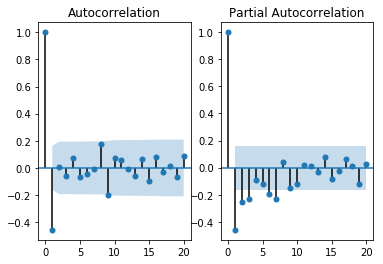

In [14]:
# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(1,2)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

There is no clear pattern in the ACF and PACF except the negative lag-1 autocorrelation in the ACF.

### Fit ARMA Model
Fit the temperature data to an AR(1), AR(2), MA(1), and ARMA(1,1) and see which model is the best fit, using the AIC criterion.

In [22]:
# Fit the data to an AR(1) model and print AIC:
mod = ARMA(chg_temp, order=(1,0), freq = chg_temp.index.inferred_freq)
res = mod.fit()
print("The AIC for an AR(1) is: ", res.aic)

# Fit the data to an AR(2) model and print AIC:
mod = ARMA(chg_temp, order=(2, 0), freq = chg_temp.index.inferred_freq)
res = mod.fit()
print("The AIC for an AR(2) is: ", res.aic)

# Fit the data to an MA(1) model and print AIC:
mod = ARMA(chg_temp, order=(0,1), freq = chg_temp.index.inferred_freq)
res = mod.fit()
print("The AIC for an MA(1) is: ", res.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod = ARMA(chg_temp, order=(1,1), freq = chg_temp.index.inferred_freq)
res = mod.fit()
print("The AIC for an ARMA(1,1) is: ", res.aic)

The AIC for an AR(1) is:  510.5346898313911
The AIC for an AR(2) is:  501.92741231602287
The AIC for an MA(1) is:  469.3909741274666
The AIC for an ARMA(1,1) is:  469.07291682369816


The MA(1) and ARMA(1,1) have the two lowest AIC values.

### Predict
Let forecast the temperature over the next 30 years using an **ARMA(1,1)** model, including confidence bands around that estimate. Earlier, you determined that the temperature data follows a **random walk** and you looked at **first differencing** the data. You will use the **ARIMA** module on the temperature data, but the forecast would be the same as using the ARMA module on changes in temperature, and then using cumulative sums of these changes to get the temperature.

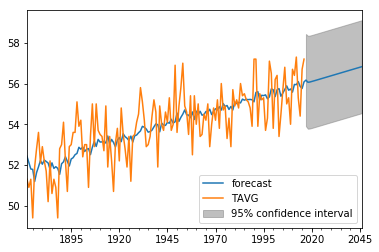

In [32]:
# Forecast interest rates using an AR(1) model
mod = ARIMA(temp_NY, order=(1,1,1), freq = temp_NY.index.inferred_freq)
res = mod.fit()
# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

According to the model (almost entirely due to the trend, the temperature is expected to be about 0.6 degrees higher in 30 years, but the 95% confidence interval around that is over 5 degrees.